uint8
(4160, 2340, 3)


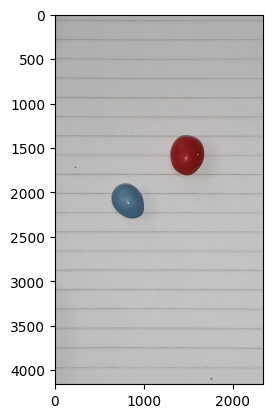

In [2]:
from matplotlib import image
from matplotlib import pyplot as plt
import numpy as np

# load image as pixel array
data = image.imread('gambar1.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)

# display the array of pixels as an image
plt.imshow(data)
plt.show()

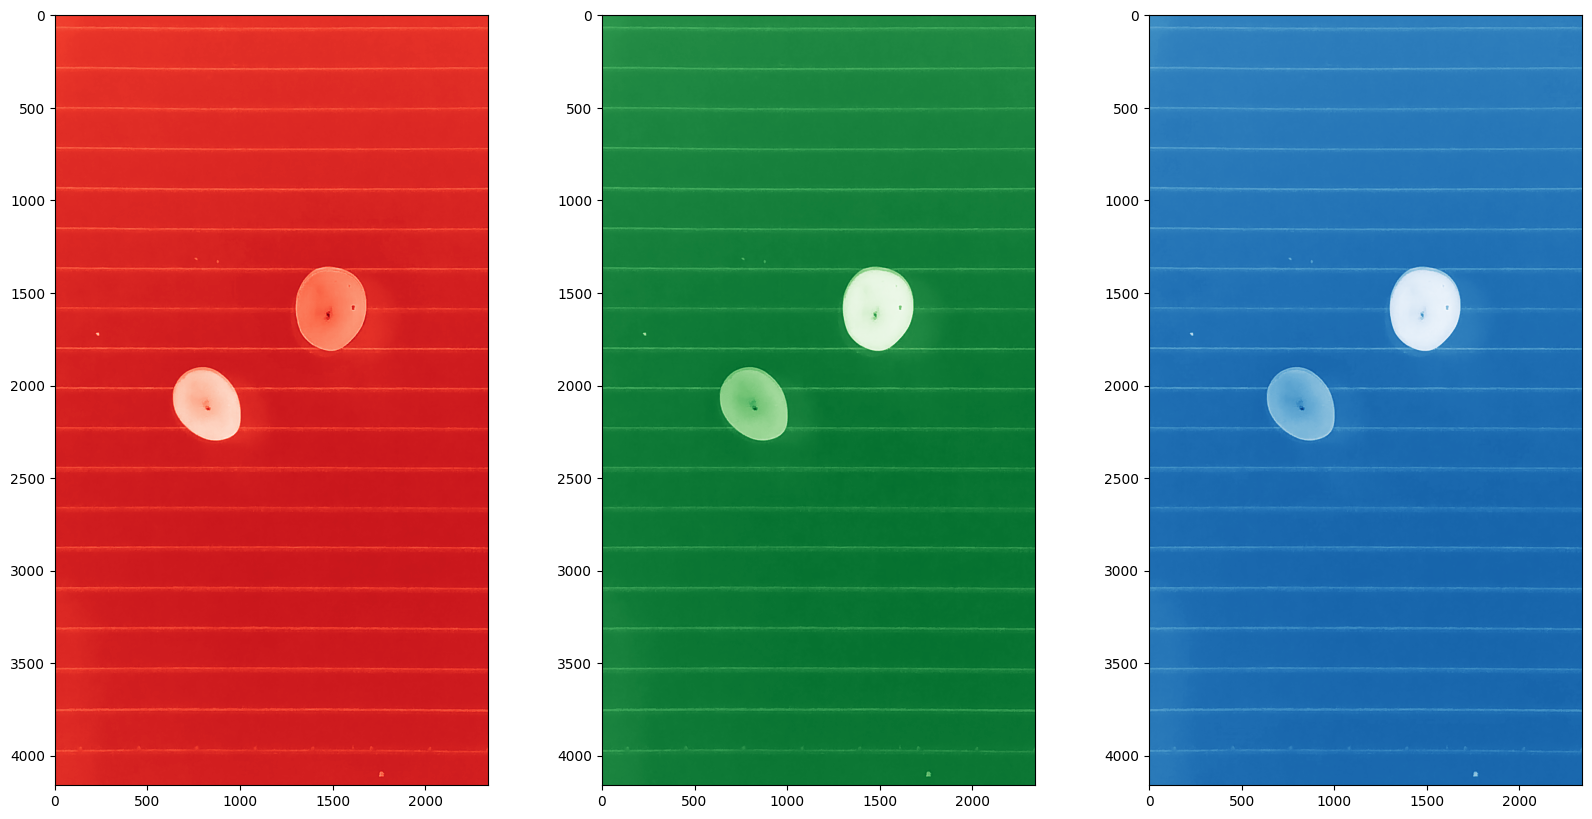

In [3]:
R = data[:,:,0]
G = data[:,:,1]
B = data[:,:,2]

# plot using matplotlib
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(R, cmap='Reds')
ax[1].imshow(G, cmap='Greens')
ax[2].imshow(B, cmap='Blues')
plt.show()

(4160, 2340, 3)


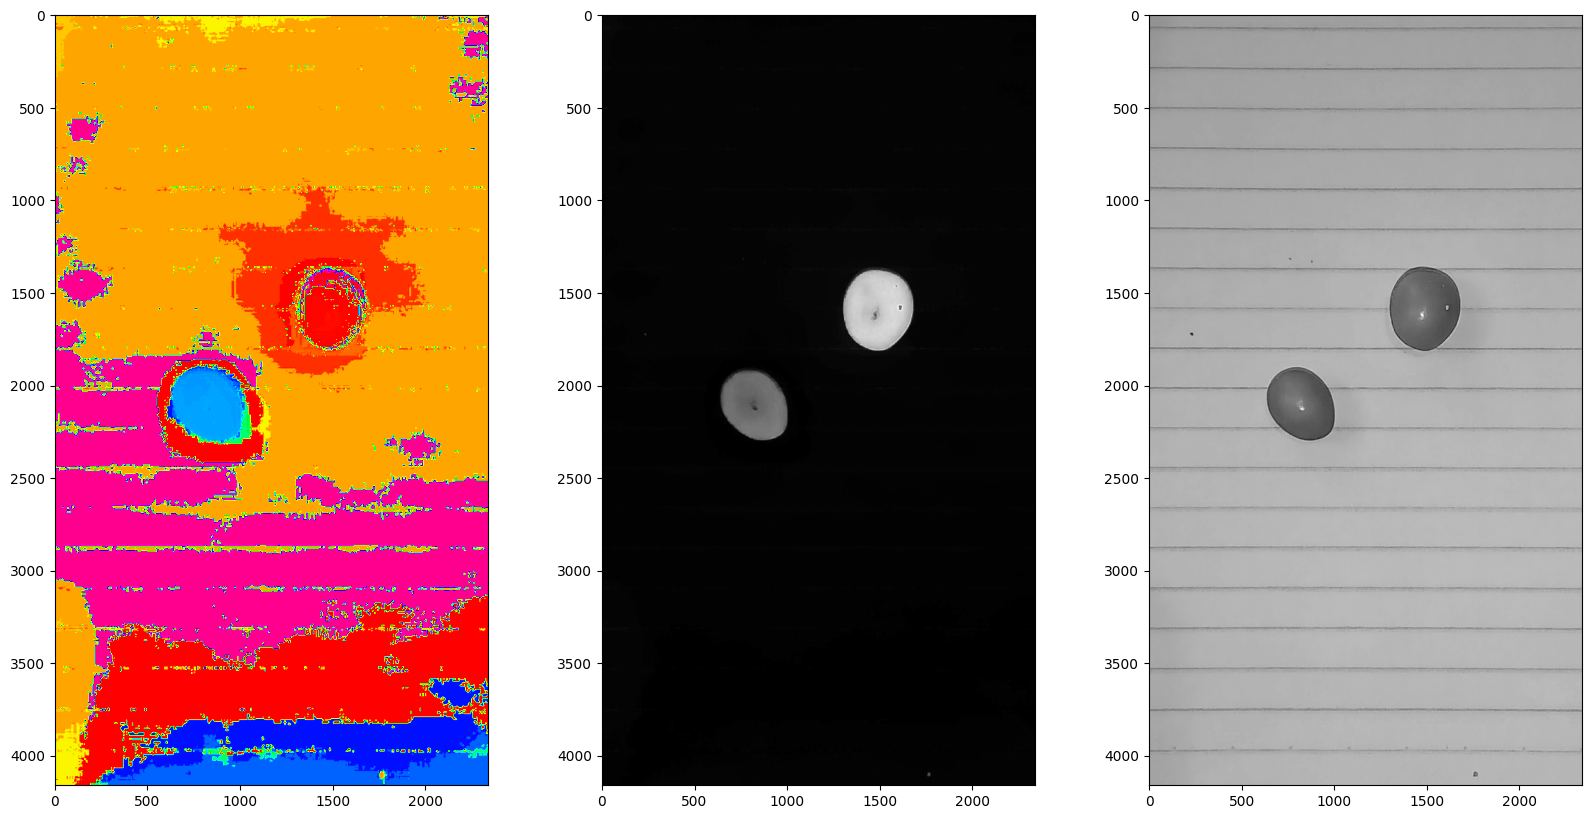

In [4]:
rgb = data/255
# convert rgb to hsv
from matplotlib import colors
hsv = colors.rgb_to_hsv(rgb)
print(hsv.shape)

# plot using matplotlib
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(hsv[:,:,0], cmap='hsv')
ax[1].imshow(hsv[:,:,1], cmap='gray')
ax[2].imshow(hsv[:,:,2], cmap='gray')
plt.show()

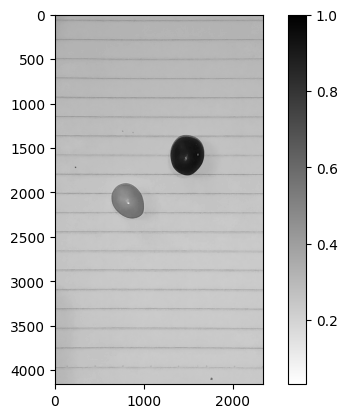

In [5]:
def filter(image_array, x, y, z):
    R = image_array[:,:,0]
    G = image_array[:,:,1]
    B = image_array[:,:,2]
    transformed = x*R + y*G + z*B
    transformed = 1 - transformed
    return transformed

x = 0
y = 0
z = 1 - x - y

transform = filter(rgb, x, y, z)
plt.imshow(transform, cmap='binary')
plt.colorbar()
plt.show()

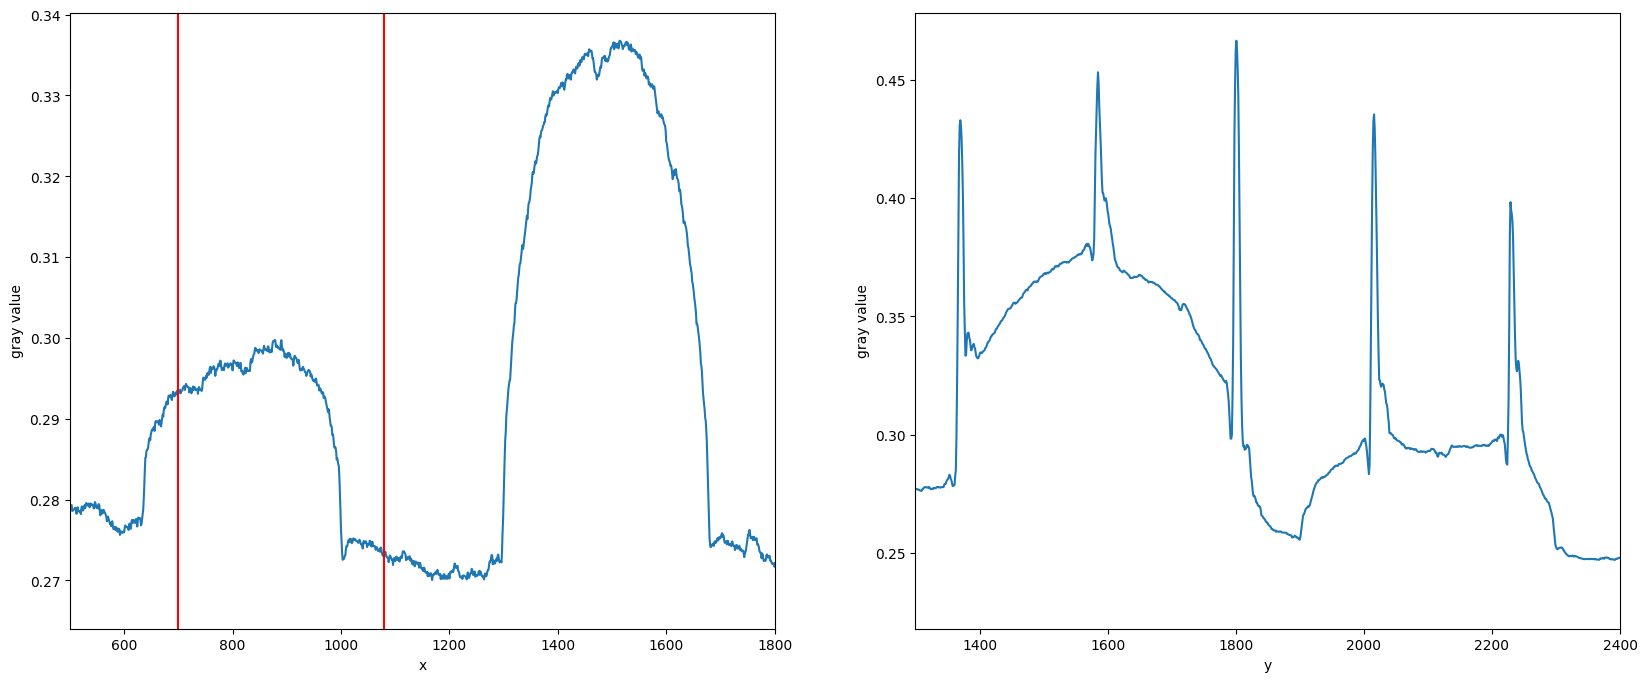

In [28]:
def summarize(array, axis=0, method="mean"):
    if method == "mean":
        return array.mean(axis=axis)
    elif method == "median":
        return np.median(array, axis=axis)
    elif method == "sum":
        return array.sum(axis=axis)
    elif method == "max":
        return array.max(axis=axis)
    else:
        return array

# x_dir = np.max(transform, axis=0)
# y_dir = np.max(transform, axis=1)

method = "mean"
x_dir = summarize(transform, axis=0, method=method)
y_dir = summarize(transform, axis=1, method=method)

x_dir_interest = x_dir
y_dir_interest = y_dir

# x_dir_left = x_dir[600:1050]
# y_dir_left = y_dir[1880:2350]
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
# ax[0].plot(x_dir_left)
# ax[1].plot(y_dir_left)
ax[0].plot(x_dir_interest)
ax[1].plot(y_dir_interest)
# add labels
ax[0].set_xlabel("x")
ax[0].set_ylabel("gray value")
ax[1].set_xlabel("y")
ax[1].set_ylabel("gray value")
# add xlimit
ax[0].set_xlim(500, 1800)
ax[1].set_xlim(1300, 2400)
# add vertical lines
ax[0].axvline(700, color='red')
ax[0].axvline(1080, color='red')
ax[1].axvline(70, color='red')
ax[1].axvline(200, color='red')
plt.show()

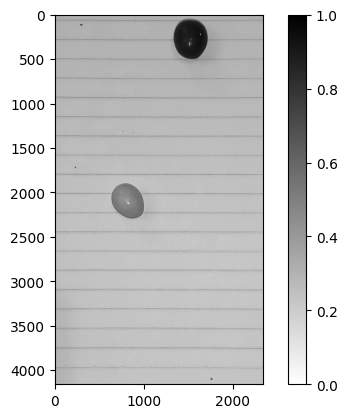

In [18]:
data_2 = image.imread('gambar2.jpg')

rgb_2 = data_2/255

transform_2 = filter(rgb_2, x, y, z)
plt.imshow(transform_2, cmap='binary')
plt.colorbar()
plt.show()


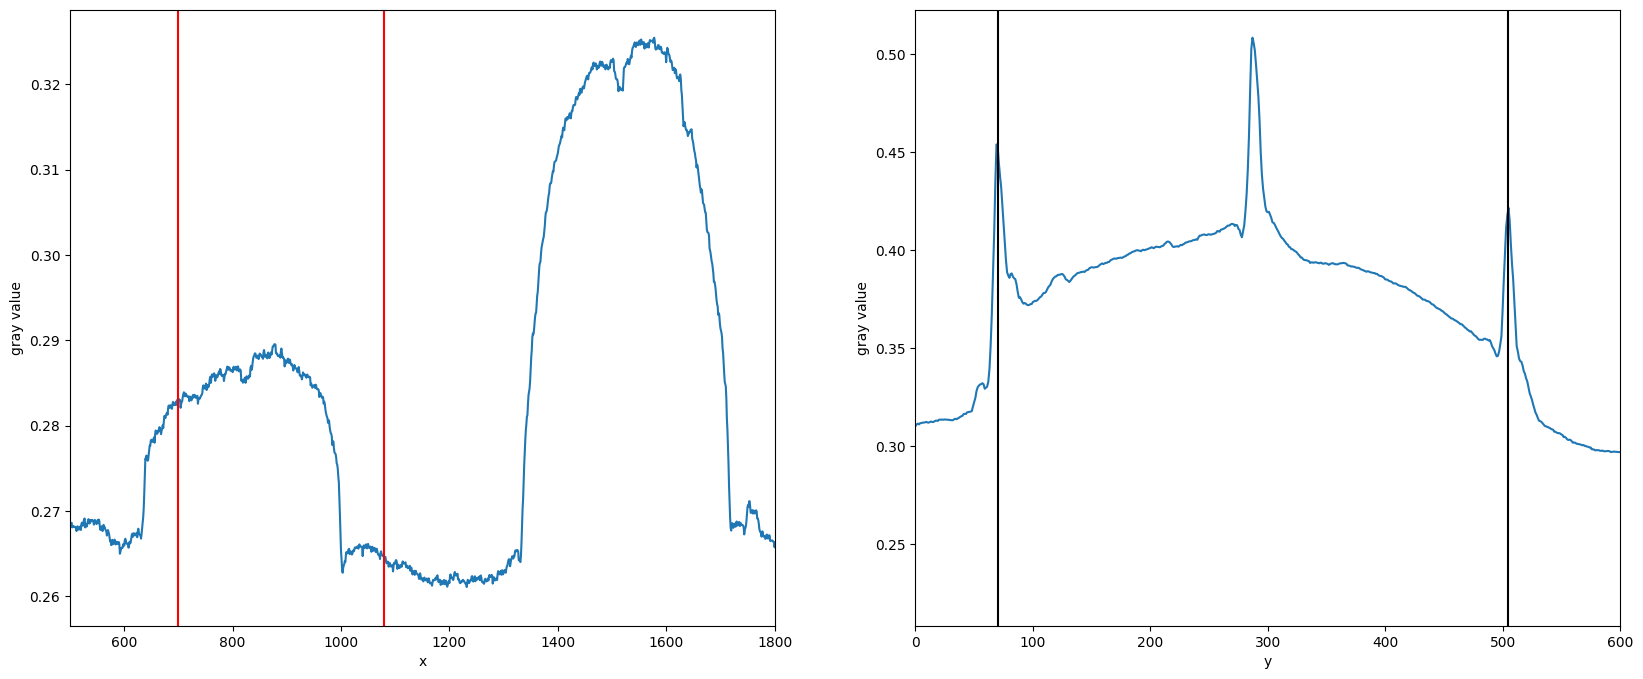

In [39]:
def summarize(array, axis=0, method="mean"):
    if method == "mean":
        return array.mean(axis=axis)
    elif method == "median":
        return np.median(array, axis=axis)
    elif method == "sum":
        return array.sum(axis=axis)
    elif method == "max":
        return array.max(axis=axis)
    else:
        return array

# x_dir = np.max(transform, axis=0)
# y_dir = np.max(transform, axis=1)

method = "mean"
x_dir = summarize(transform_2, axis=0, method=method)
y_dir = summarize(transform_2, axis=1, method=method)

x_dir_interest = x_dir
y_dir_interest = y_dir

# x_dir_left = x_dir[600:1050]
# y_dir_left = y_dir[1880:2350]
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
# ax[0].plot(x_dir_left)
# ax[1].plot(y_dir_left)
ax[0].plot(x_dir_interest)
ax[1].plot(y_dir_interest)
# add labels
ax[0].set_xlabel("x")
ax[0].set_ylabel("gray value")
ax[1].set_xlabel("y")
ax[1].set_ylabel("gray value")
# add xlimit
ax[0].set_xlim(500, 1800)
ax[1].set_xlim(000, 600)
# add vertical lines
ax[0].axvline(700, color='red')
ax[0].axvline(1080, color='red')
# add vertical lines
ax[1].axvline(70, color='k')
ax[1].axvline(505, color='k')
plt.show()

In [40]:
# line per pixel
scale_line = (505-70)/2 # pixel/line
scale_line

217.5

In [33]:
# scale
scale = 11/16 # cm/line
scale

0.6875

In [58]:
x1, y1 = 700, 70
x2, y2 = 1080, 505

In [59]:
p1 = [x1 ,y1]
p2 = [x2, y2]

# distance
d = np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2) # pixel
print(d) 
d_cm = d/scale_line*scale # cm
print(d_cm)

577.6028047023318
1.8257559918751867


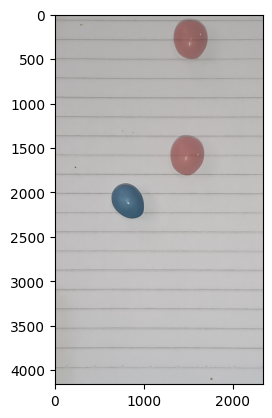

In [19]:
rgb_diff = (rgb + rgb_2)/2
plt.imshow(rgb_diff)
plt.show()

# Using CV2

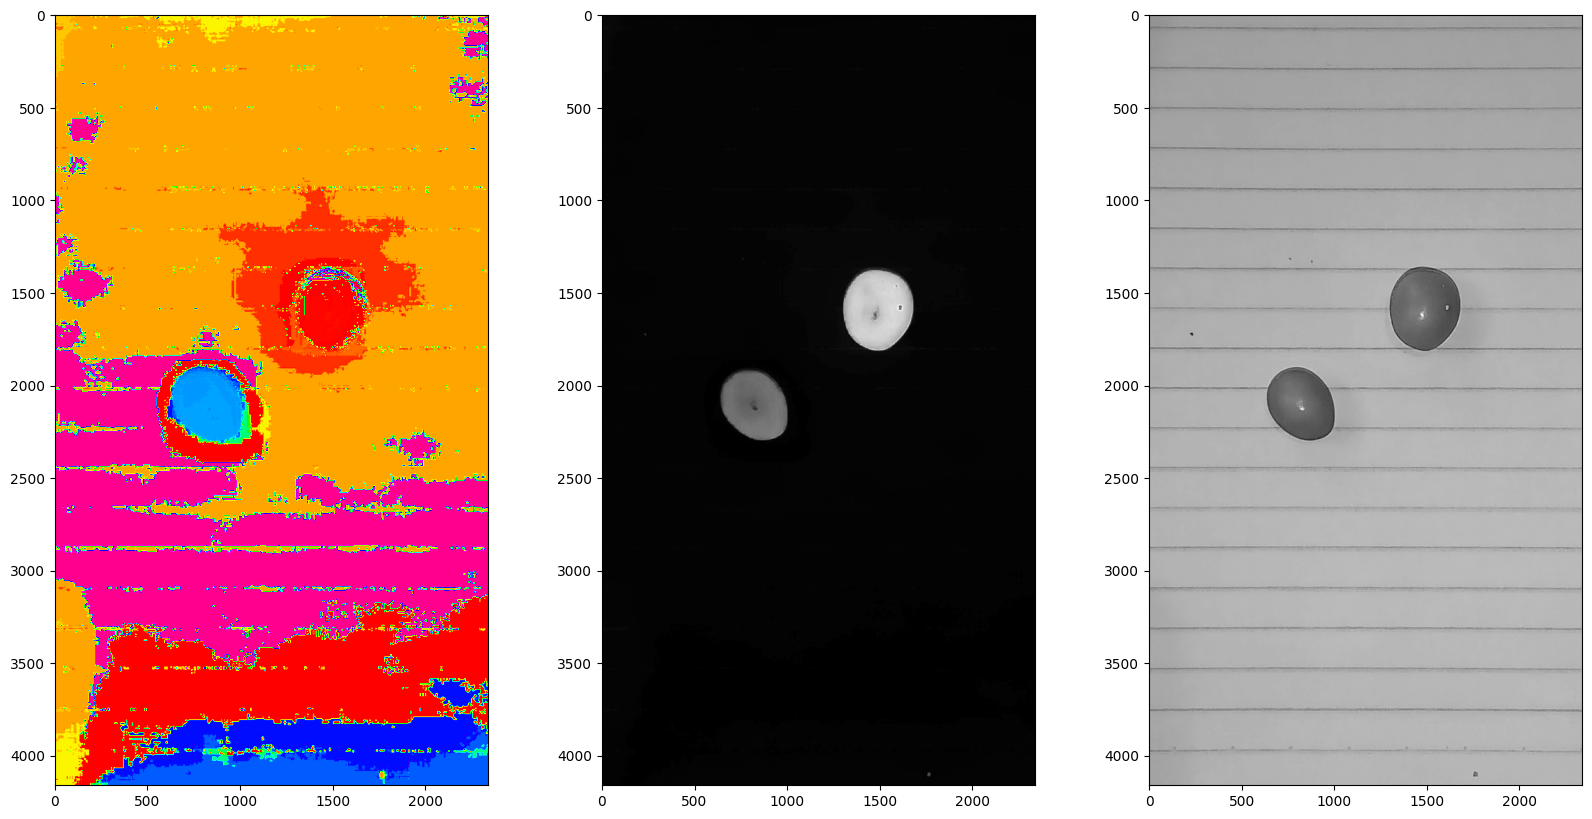

In [44]:
import cv2
import numpy as np

hsv  = cv2.cvtColor(data, cv2.COLOR_RGB2HSV)

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(h, cmap='hsv')
ax[1].imshow(s, cmap='gray')
ax[2].imshow(v, cmap='gray')
plt.show()

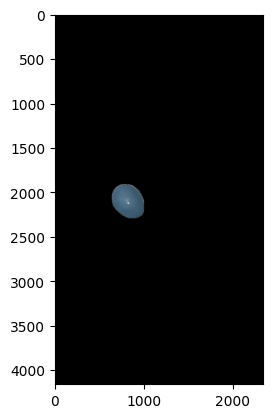

In [45]:
lower_blue = np.array([100, 20, 20])
upper_blue = np.array([150, 255, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
res = cv2.bitwise_and(data,data, mask= mask)
plt.imshow(res)

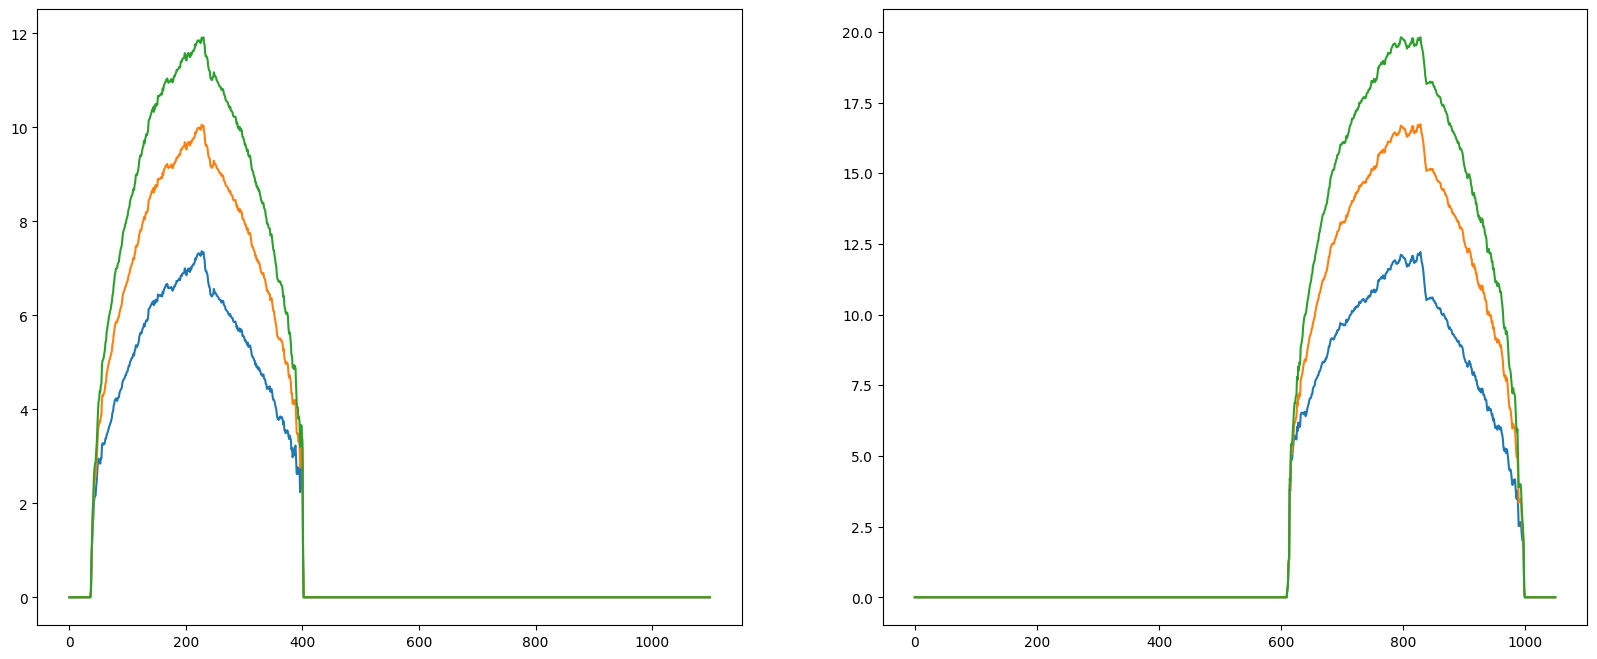

In [46]:
method = "mean"
x_dir = summarize(res, axis=0, method=method)
y_dir = summarize(res, axis=1, method=method)

x_dir_interest = x_dir[600:1700]
y_dir_interest = y_dir[1300:2350]

x_dir_left = x_dir[600:1050]
y_dir_left = y_dir[1880:2350]
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
# ax[0].plot(x_dir_left)
# ax[1].plot(y_dir_left)
ax[0].plot(x_dir_interest)
ax[1].plot(y_dir_interest)
plt.show()

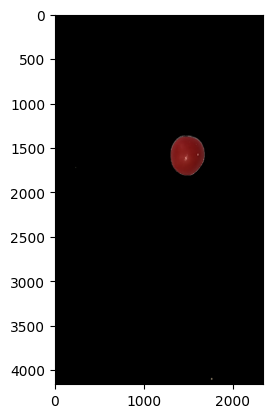

In [47]:
lower_blue = np.array([0, 30, 30])
upper_blue = np.array([50, 255, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
res = cv2.bitwise_and(data,data, mask= mask)

lower_blue = np.array([150, 50, 50])
upper_blue = np.array([200, 255, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
res2 = cv2.bitwise_and(data,data, mask= mask)

res = res + res2
plt.imshow(res)

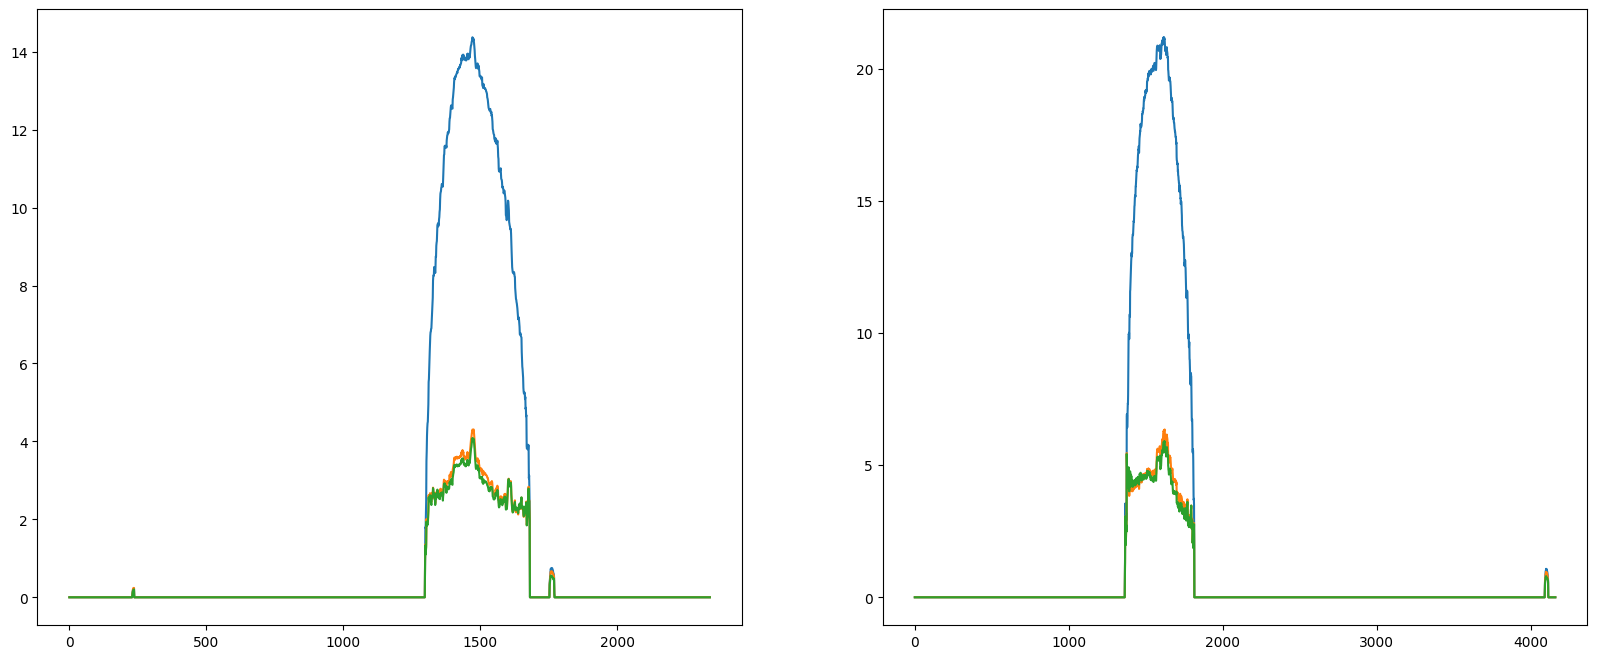

In [48]:
method = "mean"
x_dir = summarize(res, axis=0, method=method)
y_dir = summarize(res, axis=1, method=method)

x_dir_interest = x_dir
y_dir_interest = y_dir

# x_dir_left = x_dir[600:1050]
# y_dir_left = y_dir[1880:2350]
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
# ax[0].plot(x_dir_left)
# ax[1].plot(y_dir_left)
ax[0].plot(x_dir_interest)
ax[1].plot(y_dir_interest)
plt.show()

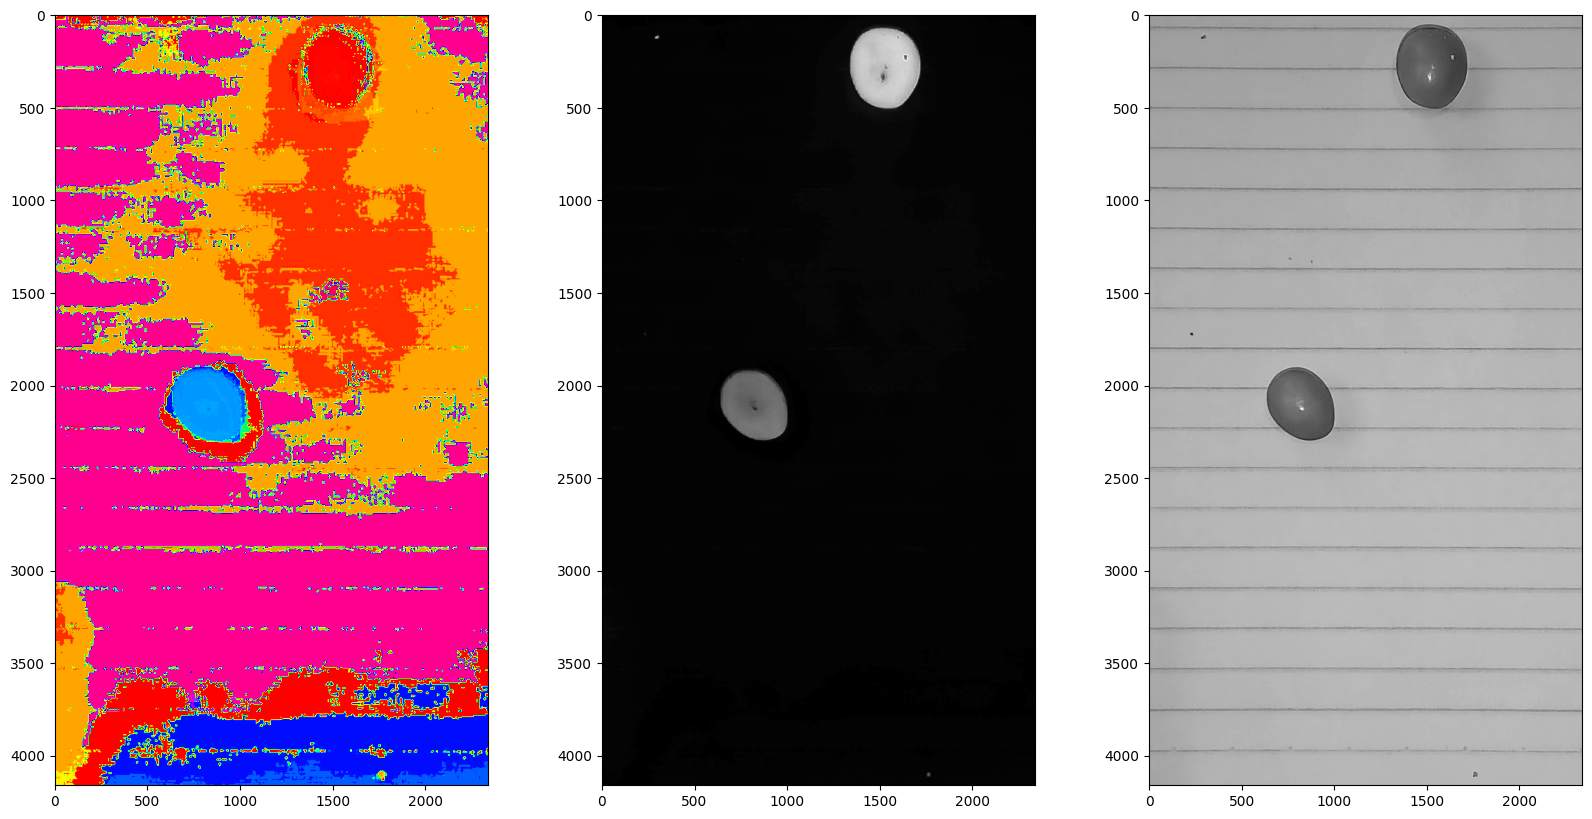

In [49]:
hsv  = cv2.cvtColor(data_2, cv2.COLOR_RGB2HSV)

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(h, cmap='hsv')
ax[1].imshow(s, cmap='gray')
ax[2].imshow(v, cmap='gray')
plt.show()

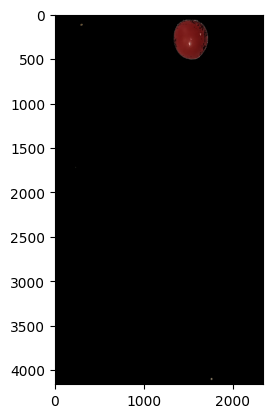

In [56]:
lower_blue = np.array([0, 30, 30])
upper_blue = np.array([50, 255, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
res = cv2.bitwise_and(data_2,data_2, mask= mask)

# lower_blue = np.array([150, 50, 50])
# upper_blue = np.array([200, 255, 255])
# mask = cv2.inRange(hsv, lower_blue, upper_blue)
# res2 = cv2.bitwise_and(data,data, mask= mask)

# res = res + res2
plt.imshow(res)

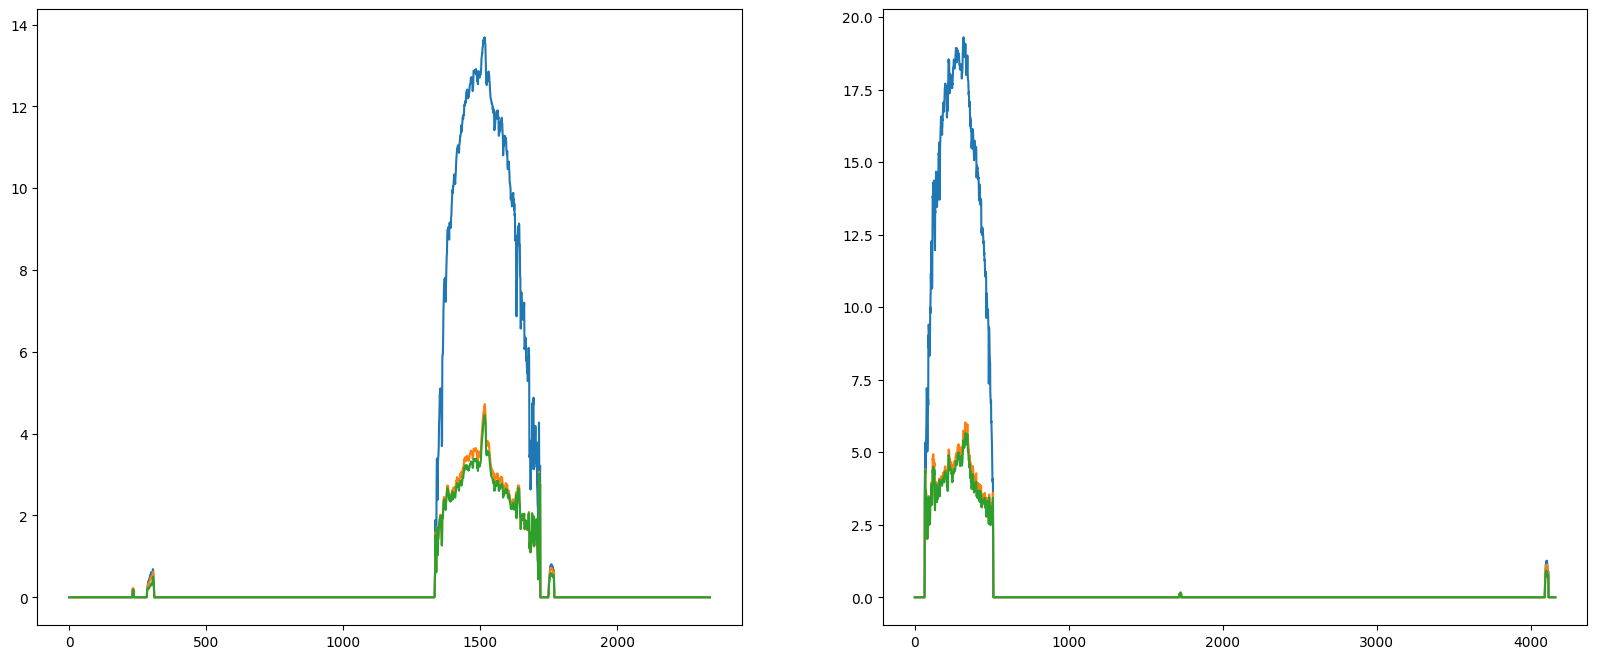

In [57]:
method = "mean"
x_dir = summarize(res, axis=0, method=method)
y_dir = summarize(res, axis=1, method=method)

x_dir_interest = x_dir
y_dir_interest = y_dir

# x_dir_left = x_dir[600:1050]
# y_dir_left = y_dir[1880:2350]
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
# ax[0].plot(x_dir_left)
# ax[1].plot(y_dir_left)
ax[0].plot(x_dir_interest)
ax[1].plot(y_dir_interest)
plt.show()